In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from IPython.display import Image

In an alternative universe, Jaina is a mage learning how to make objects fly. She wants to test how long she can fly a collection of magical carpets.


She has n training carpets – with masses given by $x_1, x_2, \ldots x_n$ – and flies these carpets once to collect training data. The experimental flight time of carpet $i$ is given by $y_i$. She believes that the flight time is well approximated by a polynomial function of the mass

$$ y_i ≈ w_0 + w_1 x_i + w_2 x_i^2 \cdots + w_D x_i^D$$

where her goal is to fit a polynomial of degree D to this data. Include all text responses and plots
in your submission.

## Part (a): Formulate LS problem

Show how Jaina’s problem can be formulated as a linear regression problem. For this part, you can either type the math in latex onto the python notebook, or attach the handwritten solution to the submitted pdf.

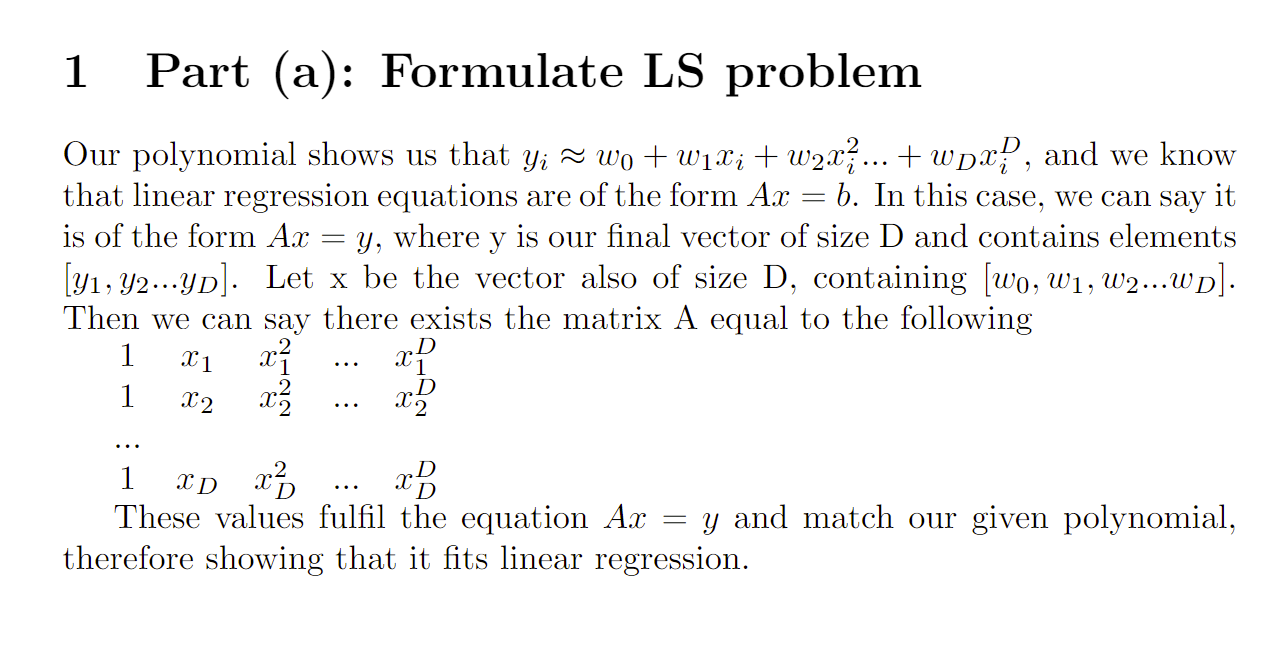

In [11]:
display(Image("./Section- Part a.png"))

## Part (b): Implement LS problem for fixed D

You are given data of the masses $\{x_i\}_{i=1}^n$ and flying times $\{y_i\}_{i=1}^n$ in the “x_train” and “y_train” keys of the file 1D poly.mat with the masses centered and normalized to lie in the range [−1,1]. 


Write a script to do a least-squares fit (taking care to include a constant term) of a polynomial function of degree fixed $D=5$ to the data. Letting $\hat{f}$ denote the fitted polynomial, report the average training error 
$$ R(D) = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2.$$ You may not use any library other than numpy and numpy.linalg for computation.

In [34]:
data = spio.loadmat('1D_poly.mat', squeeze_me=True) 
x_train = np.array(data['x_train'])
y_train = np.array(data['y_train']).T
D = 5

# TODO: Your solution for part (b) here
coefficients = np.polyfit(x_train, y_train, D)
fitted_data = np.polyval(coefficients, x_train)

for i in range(len(x_train)):
    val = y_train[i] - fitted_data[i]
    val = val**2
print(val/len(x_train))

0.0007510810987002209


## Part (c): Study the effect of D

You are given data of the masses ${x_i}_{i=1}^n$ and flying times ${x_i}_{i=1}^n$ in the “x_train” and “y_train” keys of the file 1D poly.mat with the masses centered and normalized to lie in the range [−1,1]. 


Write a script to do a least-squares fit (taking care to include a constant term) of a polynomial function of degree $D$ to the data. Letting $f_D$ denote the fitted polynomial, report the average training error 
$$ R(D) = \frac{1}{n} \sum_{i=1}^n (y_i − f_D(x_i))^2$$ against D in the range $D \in \{1,2,3,...,n − 1\}$. You may not use any library other than numpy and numpy.linalg for computation.

Text(0.5, 1.0, 'Least-Squares Fit of Polynomial Function of Degree D')

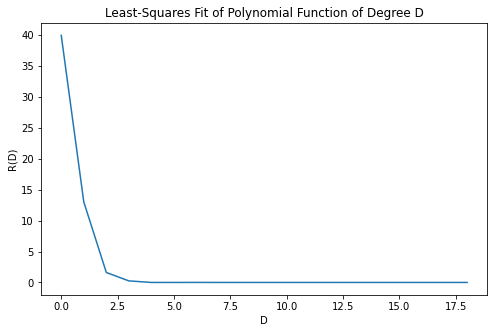

In [36]:
n = 20
err_train = np.zeros(n - 1)
# TODO: Your solution for part (c) here
for D in range(n-1):
    coefficients = np.polyfit(x_train, y_train, D)
    fitted_data = np.polyval(coefficients, x_train)
    for i in range(len(x_train)):
        val = y_train[i] - fitted_data[i]
        val = val**2
    err_train[D] = val/len(x_train)
    
plt.figure(figsize=(8,5))
plt.plot(range(len(err_train)), err_train)
plt.ylabel("R(D)")
plt.xlabel("D")
plt.title("Least-Squares Fit of Polynomial Function of Degree D")

## Part (d): Interpreting the plot

How does the average training error behave as a function of D, and why? What happens
if you try to fit a polynomial of degree n with a standard matrix inversion method? Include your answer in text here in the python notebook.

As the degree of the polynomial increases, the average training error will decrease in value. If you try to fit a polynomial of degree n with the standard matrix inversion method, you will find that we get a series of individual points, but it will be difficult to extrapolate a function from that.

## Part (e): Test Error

Jaina has taken Mystical Learning 445, and so decides that she needs to run another experiment before deciding that her prediction is true. 


She runs another fresh experiment of flight times using the same carpets, to obtain the data with key “y_fresh” in 1D_POLY.MAT.

Denoting the fresh flight time of peach i by $\tilde{y}_i$, plot the average error $$R(D) = \frac{1}{n} \sum_{i=1}^n (\tilde{y}_i − f_D(x_i))^2$$

for the same values of D as in part (c) using the polynomial approximations $f_D$ also from the previous part.

Text(0.5, 1.0, 'Least-Squares Fit of Polynomial Function of Degree D')

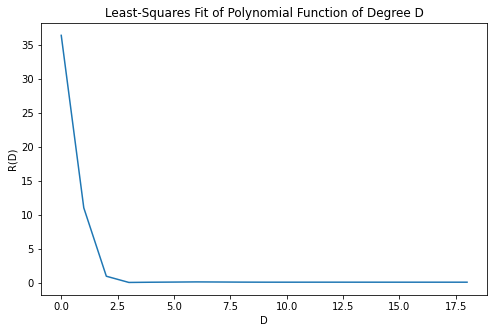

In [37]:
data = spio.loadmat('1D_poly.mat', squeeze_me=True) 
x_train = np.array(data['x_train'])
y_train = np.array(data['y_train']).T
y_fresh = np.array(data['y_fresh']).T
n = 20 #max degree
err_fresh = np.zeros(n - 1)

#TODO: Your solution for part (e) here
for D in range(n-1):
    coefficients = np.polyfit(x_train, y_train, D)
    fitted_data = np.polyval(coefficients, x_train)

    for i in range(len(x_train)):
        val = y_fresh[i] - fitted_data[i]
        val = val**2
    err_fresh[D] = val/len(x_train)


plt.figure(figsize=(8,5))
plt.plot(range(len(err_fresh)), err_fresh)
plt.ylabel("R(D)")
plt.xlabel("D")
plt.title("Least-Squares Fit of Polynomial Function of Degree D")

## Part (f): Comparison between the two plots

How does the plot above differ from the plot in (c) and why? How do you propose using the two plots from parts (c) and (e) to “select” the right polynomial model for Jaina? Include your answer in text here in the python notebook.

Hint: Find the *elbow point* in the plot above.

The two plots are similar, but the maximum error in the plot in (e) is lower than that in (c). The plot in (e) also hits it's minimum plateau value slightly earlier than the plot in (c). The right polynomial model would be the degree for which both plots have a low minimum that is almost equal to the absolute minimum that we see for even higher degrees. It seems that for this polynomial, that degree is about 2.